1. Load the Dataset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. Pre-processing and Normalizing the Data

In [2]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1) 

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)

3. Define LeNet-5 Model

Create a new instance of a model object using sequential model API. Then add layers to the neural network as per the LeNet-5 architecture discussed earlier. Finally, compile the model with the ‘categorical_crossentropy’ loss function and ‘SGD’ cost optimization algorithm. When compiling the model, add metrics=[‘accuracy’] as one of the parameters to calculate the accuracy of the model.

It is important to highlight that each image in the MNIST data set has a size of 28 X 28 pixels so we will use the same dimensions for LeNet-5 input instead of 32 X 32 pixels.

In [3]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

4. Evaluate the Model and Visualize the process

We can train the model by calling the model.fit function and pass in the training data, the expected output, the number of epochs, and batch size. Additionally, Keras provides a facility to evaluate the loss and accuracy at the end of each epoch. For this purpose, we can split the training data using the ‘validation_split’ argument or use another dataset using the ‘validation_data’ argument. We will use our training dataset to evaluate the loss and accuracy after every epoch.

We can test the model by calling model.evaluate and passing in the testing data set and the expected output. We will visualize the training process by plotting the training accuracy and loss after each epoch.

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9049 - loss: 0.3309
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9575 - loss: 0.1410
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9713 - loss: 0.0955
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9781 - loss: 0.0745
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9816 - loss: 0.0610
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9837 - loss: 0.0535
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9858 - loss: 0.0462
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9876 - loss: 0.0412
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9901 - loss: 0.0332
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0467
Accuracy :  0.9839000105857849
Training Data (60000, 28, 28) (60

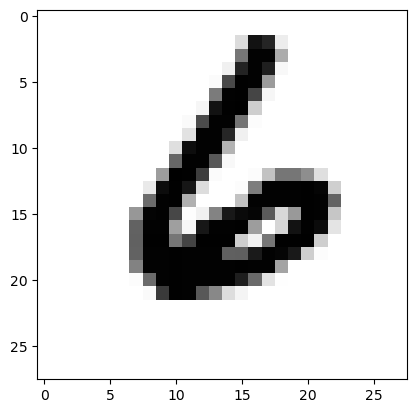

In [4]:
lenet = build_lenet(input_shape)

# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
# Transform labels to one hot encoding
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
  y_test = tf.keras.utils.to_categorical(y_test, 10)

loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())